# Demo - Topic Network Analysis in Online Communities

## Step 1 : Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import re
import spacy
from nltk.corpus import stopwords

from ipynb.fs.full.helper_functions import *

import networkx as nx
from itertools import combinations

import dataframe_image as dfi

## Step 2 : Load datasets

In [2]:
# Read data from csv files
'''Ethereum'''
df_eth_1 = pd.read_csv('../data/ethereum_posts_reddit.csv')
df_eth_2 = pd.read_csv('../data/ethereum_comments_reddit.csv')

'''Litecoin'''
df_lit_1 = pd.read_csv('../data/litecoin_posts_reddit.csv')
df_lit_2 = pd.read_csv('../data/litecoin_comments_reddit.csv')

'''Dogecoin'''
df_dog_1 = pd.read_csv('../data/dogecoin_posts_reddit.csv')
df_dog_2 = pd.read_csv('../data/dogecoin_comments_reddit.csv')

'''NEM'''
df_nem_1 = pd.read_csv('../data/nem_posts_reddit.csv')
df_nem_2 = pd.read_csv('../data/nem_comments_reddit.csv')

'''Ripple'''
df_rip_1 = pd.read_csv('../data/ripple_posts_reddit.csv')
df_rip_2 = pd.read_csv('../data/ripple_comments_reddit.csv')

'''Binance'''
df_bin_1 = pd.read_csv('../data/binance_posts_reddit.csv')
df_bin_2 = pd.read_csv('../data/binance_comments_reddit.csv')

'''Iota'''
df_iot_1 = pd.read_csv('../data/iota_posts_reddit.csv')
df_iot_2 = pd.read_csv('../data/iota_comments_reddit.csv')

'''Cardano'''
df_car_1 = pd.read_csv('../data/cardano_posts_reddit.csv')
df_car_2 = pd.read_csv('../data/cardano_comments_reddit.csv')


''' -> Add additional data below'''
# df_XXX_1 = pd.read_csv('../data/XXX_posts_reddit.csv')
# df_XXX_2 = pd.read_csv('../data/XXX_comments_reddit.csv')

' -> Add additional data below'

## Step 3 : Data exploration

##### We are provided with eight datasets. Each dataset consists of a "post.csv" file and a "comment.csv" file. These files are extracted from the subreddits within the Reddit community

In [3]:
# Posts
df_eth_1.head()

,sub_id,subreddit_id,subreddit_name,sub_author,sub_title,sub_body,sub_score,sub_upvote_ratio,sub_num_comments,sub_date,updated_at,subreddit_subscribers
0,t3_lqr35c,t5_2zf9m,ethereum,rexaffects,New Ethereum artwork!,NaN,681,0.96,126,2021-02-23 19:42:09,2021-02-25 13:47:58,690562
1,t3_lqqli4,t5_2zf9m,ethereum,Hapstipo,Only 8mh/s on rx 580?,[removed],1,0.60,36,2021-02-23 19:21:22,2021-02-25 13:30:17,690542
2,t3_lqms39,t5_2zf9m,ethereum,mfinner,Ethereum Layer 2 is here and ramping up each d...,NaN,110,0.97,11,2021-02-23 16:42:59,2021-02-25 11:19:54,690372
3,t3_lqmjz6,t5_2zf9m,ethereum,BanklessHQ,Mark Cuban says politicians can’t stop #DeFi l...,NaN,2031,0.97,514,2021-02-23 16:33:42,2021-02-25 11:12:29,690364
4,t3_lqln53,t5_2zf9m,ethereum,DappRadar,What is the difference between DeFi and High-R...,NaN,3,0.71,2,2021-02-23 15:56:29,2021-02-25 10:42:13,690308


In [4]:
# Comments
df_eth_2.head()

,com_id,sub_id,com_parentid,com_author,com_body,com_score,com_layer,com_date,subreddit_id,updated_at
0,t1_gog6iy9,t3_lq00xa,t3_lq00xa,kippelization,"Shiterium is shit, it's even in its name.",-1,3,2021-02-23 11:16:05,t5_2zf9m,2021-02-25 06:53:01
1,t1_gofq7el,t3_lpz0gq,t3_lpz0gq,CompassNeedle,You should look into loopring to reduce fees. ...,1,3,2021-02-23 07:07:03,t5_2zf9m,2021-02-25 04:45:58
2,t1_gog4zgp,t3_lppswb,t3_lppswb,Aquirox,Eth need the eip 1559 now ! \nPut it on berlin...,0,3,2021-02-23 10:53:23,t5_2zf9m,2021-02-25 06:40:49
3,t1_gofjugq,t3_lpvzeo,t3_lpvzeo,digbickjimmy69,F,1,3,2021-02-23 05:47:38,t5_2zf9m,2021-02-25 03:57:24
4,t1_goiiwgx,t3_lqsv0r,t3_lqsv0r,Jedi_Tounges,It's like that stupid fucking android app that...,6,3,2021-02-23 22:10:57,t5_2zf9m,2021-02-25 19:07:25


In [5]:
# Save post & comment dataframe as image
dfi.export(df_eth_1.head(), '../image/3.1_posts_file_example.png')
dfi.export(df_eth_2.head(), '../image/3.2_comments_file_example.png')

In [6]:
df_eth_1.sub_title.value_counts()

strawberries on the blockchain                                                                                                                                                                                                                                                  11
Wealthsimple Trade is Canada's first $0 commission stock trading app – sign up now and we'll both get $10 to trade. https://my.wealthsimple.com/app/public/trade-referral-signup?code=KEJJ4Q WEALTHSIMPLE TRADE $10 REFERRAL CODE : USE * KEJJ4Q * - COUPON CODE - EARN CASH    10
Ethereum                                                                                                                                                                                                                                                                         7
The Absolute Beginner’s Guide to Cryptocurrency Investing                                                                                                                      

In [7]:
df_eth_1.sub_body.value_counts()

[removed]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [8]:
df_eth_2.com_body.value_counts()

[removed]                                                                                                                                                                                                      5946
[deleted]                                                                                                                                                                                                       909
You're welcome.                                                                                                                                                                                                  48
Yes                                                                                                                                                                                                              41
Thanks!                                                                                                                                                 

## Step 4 : Data processing

### 4.1 Preprocess data

In [9]:
'''Ethereum'''
df_eth = preprocess_data(df_eth_1,df_eth_2)
# df_eth['text'] = df_eth['text'].str.replace(r'\bethereum\b', '', case = False)

'''Litecoin'''
df_lit = preprocess_data(df_lit_1, df_lit_2)
# df_lit['text'] = df_lit['text'].str.replace(r'\blitecoin\b', '', case = False)

'''Dogecoin'''
df_dog = preprocess_data(df_dog_1,df_dog_2)
# df_dog['text'] = df_dog['text'].str.replace(r'\bdogecoin\b', '', case = False)

'''NEM'''
df_nem = preprocess_data(df_nem_1,df_nem_2)
# df_nem['text'] = df_nem['text'].str.replace(r'\bnemecoin\b', '', case = False)

'''Ripple'''
df_rip = preprocess_data(df_rip_1,df_rip_2)

'''Binance'''
df_bin = preprocess_data(df_bin_1,df_bin_2)

'''Iota'''
df_iot = preprocess_data(df_iot_1,df_iot_2)

'''Cardano'''
df_car = preprocess_data(df_car_1,df_car_2)

'''Add additional data below'''
# df_XXX = preprocess_data(df_XXX_1, df_XXX_2)

'Add additional data below'

#### - Example of preprocessed data -

In [10]:
df_eth

,sub_id,text,date
877,t3_knchgy,Not in the compute space. Private companies an...,2021-01-01 00:01:33
878,t3_knkukl,"Take the chart, throw it in log, and you'll fi...",2021-01-01 00:03:33
31509,t3_knujd0,you can use metamask wallet or a number of oth...,2021-01-01 00:07:51
31508,t3_knkukl,You are exactly where I was three years ago. ...,2021-01-01 00:08:17
448,t3_ko17gr,I cant even buy 1 ethereum with the stimulus c...,2021-01-01 00:11:01
...,...,...,...
795,t3_lt8xgw,When might it have smart contracts? ;),2021-02-27 23:53:06
1499,t3_lu0i2d,"Low supply, robust project ,affordable price",2021-02-27 23:54:20
47553,t3_ltu192,"I suggest you research about ADA, you can dele...",2021-02-27 23:54:56
54087,t3_ltlht9,In Rick Dudley's original implementation they ...,2021-02-27 23:57:52


In [11]:
dfi.export(df_eth.head(), '../image/4.1_preprocessed_data_example.png')

### 4.2 Check if datasets have the same time span

In [12]:
'''Ethereum'''
eth_timespan = get_timespan(df_eth)

'''Litecoin'''
lit_timespan = get_timespan(df_lit)

'''Dogecoin'''
dog_timespan = get_timespan(df_dog)

'''NEM'''
nem_timespan = get_timespan(df_nem)

'''Ripple'''
rip_timespan = get_timespan(df_rip)

'''Binance'''
bin_timespan = get_timespan(df_bin)

'''Iota'''
iot_timespan = get_timespan(df_iot)

'''Cardano'''
car_timespan = get_timespan(df_car)

'''Add additional data below'''
# XXX_timespan = get_timespan(df_XXX)

'Add additional data below'

In [13]:
''' Add more conditions below (e.g., car_timespan == XXX_timespan) '''
if (eth_timespan == lit_timespan and lit_timespan == dog_timespan and
    dog_timespan == nem_timespan and nem_timespan == rip_timespan and 
    rip_timespan == bin_timespan and bin_timespan == iot_timespan and 
    iot_timespan == car_timespan): 
    timespan = eth_timespan
else:
    raise Exception("ERROR: Please make sure that all datasets have the same time span!")

==============================================================================================================================================

### 4.3 Split document based on time frame intervals

#### - Determine a proper time frame -

In [14]:
'''Set timeframe interval to 1 day'''
delta = np.timedelta64(1,'D')
    
num_of_timeframes, timeframe_list = get_timeframes(timespan, delta)
formatted_timeframes_str = get_formatted_timeframes_str(timeframe_list)

#### - Split doucments into smaller documents -

In [15]:
'''Ethereum'''
eth_doc_list = split_doc_by_timeframe(timeframe_list, df_eth)

'''Litecoin'''
lit_doc_list = split_doc_by_timeframe(timeframe_list, df_lit)

'''Dogecoin'''
dog_doc_list = split_doc_by_timeframe(timeframe_list, df_dog)

'''NEM'''
nem_doc_list = split_doc_by_timeframe(timeframe_list, df_nem)

'''Ripple'''
rip_doc_list = split_doc_by_timeframe(timeframe_list, df_rip)

'''Binance'''
bin_doc_list = split_doc_by_timeframe(timeframe_list, df_bin)

'''Iota'''
iot_doc_list = split_doc_by_timeframe(timeframe_list, df_iot)

'''Cardano'''
car_doc_list = split_doc_by_timeframe(timeframe_list, df_car)


'''Add additional data below'''
# XXX_doc_list = split_doc_by_timeframe(timeframe_list, df_XXX)

'Add additional data below'

==============================================================================================================================================

### 4.4 Process data (tokenisation, building N-grams and lemmatisation)

In [16]:
'''Ethereum'''
eth_doc_list_ready = [process_words(doc) for doc in eth_doc_list]

eth_numOfSamples_list = [len(doc) for doc in eth_doc_list]
df_eth_processed = get_df_processed(formatted_timeframes_str, eth_numOfSamples_list, eth_doc_list_ready)
df_eth_processed.head()

,Timeframe interval,Sample size,Document
Timeframe 1,[ 2021-01-01 - 2021-01-02 ),499,"[[compute, space, private, company, university..."
Timeframe 2,[ 2021-01-02 - 2021-01-03 ),502,"[[cost, approximately], [thesis, college, issu..."
Timeframe 3,[ 2021-01-03 - 2021-01-04 ),1095,"[[fine, food, smart, enough, articulate, lack,..."
Timeframe 4,[ 2021-01-04 - 2021-01-05 ),782,"[[offline, mew, wallet, hardware, wallet, offl..."
Timeframe 5,[ 2021-01-05 - 2021-01-06 ),674,"[[exactly, tether, shady, peg, reason], [newbi..."


In [17]:
dfi.export(df_eth_processed.head(), '../image/4.4_processed_data_example.png')

In [18]:
'''Litecoin'''
lit_doc_list_ready = [process_words(doc) for doc in lit_doc_list]

lit_numOfSamples_list = [len(doc) for doc in lit_doc_list]
df_lit_processed = get_df_processed(formatted_timeframes_str, lit_numOfSamples_list, lit_doc_list_ready)
df_lit_processed.head()

,Timeframe interval,Sample size,Document
Timeframe 1,[ 2021-01-01 - 2021-01-02 ),118,"[[good, luck], [price, range, thing, buy, frac..."
Timeframe 2,[ 2021-01-02 - 2021-01-03 ),123,"[[litecoin, planning, add, privacy, therefore,..."
Timeframe 3,[ 2021-01-03 - 2021-01-04 ),208,"[[fly, away], [], [guess], [short], [take, con..."
Timeframe 4,[ 2021-01-04 - 2021-01-05 ),158,"[[give, grandkid], [ath], [beautiful], [liteco..."
Timeframe 5,[ 2021-01-05 - 2021-01-06 ),228,"[[join, interest, bearing, litecoin, platform,..."


In [19]:
'''Dogecoin'''
dog_doc_list_ready = [process_words(doc) for doc in dog_doc_list]

dog_numOfSamples_list = [len(doc) for doc in dog_doc_list]
df_dog_processed = get_df_processed(formatted_timeframes_str, dog_numOfSamples_list, dog_doc_list_ready)
df_dog_processed.head()

,Timeframe interval,Sample size,Document
Timeframe 1,[ 2021-01-01 - 2021-01-02 ),698,"[[long, take, sync, bootstrap, get, dogecoin, ..."
Timeframe 2,[ 2021-01-02 - 2021-01-03 ),5546,"[[learn, speak], [idk, little, extra, spend, p..."
Timeframe 3,[ 2021-01-03 - 2021-01-04 ),4254,"[[predict, correct], [hell, get, dollar, wait]..."
Timeframe 4,[ 2021-01-04 - 2021-01-05 ),2774,"[[find, answer, large, tip, handle, tip, bot, ..."
Timeframe 5,[ 2021-01-05 - 2021-01-06 ),2076,"[[wait, connect, peer, network, congestion, ea..."


In [20]:
'''NEM'''
nem_doc_list_ready = [process_words(doc) for doc in nem_doc_list]

nem_numOfSamples_list = [len(doc) for doc in nem_doc_list]
df_nem_processed = get_df_processed(formatted_timeframes_str, nem_numOfSamples_list, nem_doc_list_ready)
df_nem_processed.head()

,Timeframe interval,Sample size,Document
Timeframe 1,[ 2021-01-01 - 2021-01-02 ),16,"[[jump, hour, significance, happen, new, justi..."
Timeframe 2,[ 2021-01-02 - 2021-01-03 ),6,"[[fine, hold, bag], [], [nice, harvest, reward..."
Timeframe 3,[ 2021-01-03 - 2021-01-04 ),6,"[[glad, get, testnet], [launch, symbol, public..."
Timeframe 4,[ 2021-01-04 - 2021-01-05 ),11,"[[partnership, demonstration, commitment, stre..."
Timeframe 5,[ 2021-01-05 - 2021-01-06 ),14,"[[encourage, participate, poi, voting, regard,..."


In [21]:
'''Ripple'''
rip_doc_list_ready = [process_words(doc) for doc in rip_doc_list]

rip_numOfSamples_list = [len(doc) for doc in rip_doc_list]
df_rip_processed = get_df_processed(formatted_timeframes_str, rip_numOfSamples_list, rip_doc_list_ready)
df_rip_processed.head()

,Timeframe interval,Sample size,Document
Timeframe 1,[ 2021-01-01 - 2021-01-02 ),233,"[[wallet, answer, old, buy, new, phone, add, x..."
Timeframe 2,[ 2021-01-02 - 2021-01-03 ),284,"[[definitely, bitcoin, massive, selloff, likel..."
Timeframe 3,[ 2021-01-03 - 2021-01-04 ),389,"[[suit, participate, possibility, powerful, ba..."
Timeframe 4,[ 2021-01-04 - 2021-01-05 ),342,"[[fud, crybaby, sit, sideline, angry, coin, pu..."
Timeframe 5,[ 2021-01-05 - 2021-01-06 ),399,"[[jerk], [today, check, theory, work, bitstamp..."


In [22]:
'''Binance'''
bin_doc_list_ready = [process_words(doc) for doc in bin_doc_list]

bin_numOfSamples_list = [len(doc) for doc in bin_doc_list]
df_bin_processed = get_df_processed(formatted_timeframes_str, bin_numOfSamples_list, bin_doc_list_ready)
df_bin_processed.head()

,Timeframe interval,Sample size,Document
Timeframe 1,[ 2021-01-01 - 2021-01-02 ),147,"[[reset, deposit, ask, couple, get, yubikey, p..."
Timeframe 2,[ 2021-01-02 - 2021-01-03 ),437,"[[altstreetbet, crazy, gain, loss, huge, binan..."
Timeframe 3,[ 2021-01-03 - 2021-01-04 ),504,"[[ever, pay, dogecoin], [well, get, deny, toda..."
Timeframe 4,[ 2021-01-04 - 2021-01-05 ),537,"[[new, cryptocurrency, hear, good, buy, deposi..."
Timeframe 5,[ 2021-01-05 - 2021-01-06 ),516,"[[many, complaint, support, lack], [always, te..."


In [23]:
'''Iota'''
iot_doc_list_ready = [process_words(doc) for doc in iot_doc_list]

iot_numOfSamples_list = [len(doc) for doc in iot_doc_list]
df_iot_processed = get_df_processed(formatted_timeframes_str, iot_numOfSamples_list, iot_doc_list_ready)
df_iot_processed.head()

,Timeframe interval,Sample size,Document
Timeframe 1,[ 2021-01-01 - 2021-01-02 ),15,"[[owl, summary, disclaimer, arbitrary, editing..."
Timeframe 2,[ 2021-01-02 - 2021-01-03 ),36,"[[trust, ledger, trinity, wallet, compatible, ..."
Timeframe 3,[ 2021-01-03 - 2021-01-04 ),106,"[[keep, discord], [world, president, free, wor..."
Timeframe 4,[ 2021-01-04 - 2021-01-05 ),201,"[[invest, iota], [post, seem, price, market, o..."
Timeframe 5,[ 2021-01-05 - 2021-01-06 ),123,"[[late, conversation, simple, gon, trash, turn..."


In [24]:
'''Cardano'''
car_doc_list_ready = [process_words(doc) for doc in car_doc_list]

car_numOfSamples_list = [len(doc) for doc in car_doc_list]
df_car_processed = get_df_processed(formatted_timeframes_str, car_numOfSamples_list, car_doc_list_ready)
df_car_processed.head()

,Timeframe interval,Sample size,Document
Timeframe 1,[ 2021-01-01 - 2021-01-02 ),306,"[[happy, new, family], [source, original, post..."
Timeframe 2,[ 2021-01-02 - 2021-01-03 ),371,"[[lend, platform, return, back, lender, lender..."
Timeframe 3,[ 2021-01-03 - 2021-01-04 ),529,"[[huge, opportunity, thrive, ability, scale, w..."
Timeframe 4,[ 2021-01-04 - 2021-01-05 ),612,"[[], [feel, old], [], [turn, start, invest, cr..."
Timeframe 5,[ 2021-01-05 - 2021-01-06 ),958,"[[yea, bullet, dome, profitable, avoid, taxis,..."


In [25]:
'''Add additional data below'''
# XXX_doc_list_ready = [process_words(doc) for doc in XXX_doc_list]

# XXX_numOfSamples_list = [len(doc) for doc in XXX_doc_list]
# df_XXX_processed = get_df_processed(formatted_timeframes_str, XXX_numOfSamples_list, XXX_doc_list_ready)
# df_XXX_processed.head()

'Add additional data below'

==============================================================================================================================================

### 4.5 Create the Dictionary and Corpus for Topic Modeling

In [26]:
'''Ethereum'''
eth_id2word, eth_corpus = convert_to_bagOfWords(eth_doc_list_ready)

'''Litecoin'''
lit_id2word, lit_corpus = convert_to_bagOfWords(lit_doc_list_ready)

'''Dogecoin'''
dog_id2word, dog_corpus = convert_to_bagOfWords(dog_doc_list_ready)

'''NEM'''
nem_id2word, nem_corpus = convert_to_bagOfWords(nem_doc_list_ready)

'''Ripple'''
rip_id2word, rip_corpus = convert_to_bagOfWords(rip_doc_list_ready)

'''Binance'''
bin_id2word, bin_corpus = convert_to_bagOfWords(bin_doc_list_ready)

'''Iota'''
iot_id2word, iot_corpus = convert_to_bagOfWords(iot_doc_list_ready)

'''Cardano'''
car_id2word, car_corpus = convert_to_bagOfWords(car_doc_list_ready)


'''Add additional data below'''
# XXX_id2word, XXX_corpus = convert_to_bagOfWords(XXX_doc_list_ready)

'Add additional data below'

## Step 5: Topic Modeling

### • LDA with Gensim

In [27]:
num_of_topics = 10
num_topics_list = [num_of_topics] * num_of_timeframes

In [65]:
'''Ethereum'''
eth_lda_model_list = get_lda_models(eth_corpus, eth_id2word, num_topics_list)
eth_topics_list = get_topics(eth_lda_model_list, num_topics_list)
df_eth_topics = get_df_topics(eth_topics_list)
df_eth_topics.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
TF 1,buy,ethereum,good,nft,option,price,time,wallet,-,-
TF 2,ethereum,fee,get,wallet,-,-,-,-,-,-
TF 3,bitcoin,buy,ethereum,fee,good,price,wallet,-,-,-
TF 4,ethereum,get,time,transaction,upgrade,wallet,-,-,-,-
TF 5,bitcoin,eth,ethereum,fee,good,wallet,well,-,-,-


In [29]:
dfi.export(df_eth_topics.head(), '../image/5.1_topics_example.png')

In [30]:
'''Litecoin'''
lit_lda_model_list = get_lda_models(lit_corpus, lit_id2word, num_topics_list)
lit_topics_list = get_topics(lit_lda_model_list, num_topics_list)
df_lit_topics = get_df_topics(lit_topics_list)
df_lit_topics.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9
TF 1,bitcoin,buy,coin,litecoin,pump,-,-,-,-
TF 2,bitcoin,fork,get,litecoin,privacy,work,-,-,-
TF 3,bitcoin,litecoin,wallet,-,-,-,-,-,-
TF 4,litecoin,stock,transaction,wallet,-,-,-,-,-
TF 5,bitcoin,coin,get,litecoin,wallet,-,-,-,-


In [31]:
'''Dogecoin'''
dog_lda_model_list = get_lda_models(dog_corpus, dog_id2word, num_topics_list)
dog_topics_list = get_topics(dog_lda_model_list, num_topics_list)
df_dog_topics = get_df_topics(dog_topics_list)
df_dog_topics.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
TF 1,buy,dogecoin,-,-,-,-,-,-,-,-
TF 2,buy,dogecoin,hit,hodl,hodle,hold,mar,moon,sell,-
TF 3,dogecoin,get,hodl,hold,wallet,-,-,-,-,-
TF 4,bitcoin,buy,dogecoin,get,happen,sell,wallet,-,-,-
TF 5,buy,coin,dogecoin,get,good,hodl,hope,man,-,-


In [32]:
'''NEM'''
nem_lda_model_list = get_lda_models(nem_corpus, nem_id2word, num_topics_list)
nem_topics_list = get_topics(nem_lda_model_list, num_topics_list)
df_nem_topics = get_df_topics(nem_topics_list)
df_nem_topics.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
TF 1,airdrop,bitcoin,collect,congratulation,cryptocurrency,launch,market,team,worth,-
TF 2,bag,bitcoin,complete,fine,hold,nice,reward,-,-,-
TF 3,chain,hodl,preformace,symbol,testnet,-,-,-,-,-
TF 4,amp,bittrex,brand,exchange,partnership,symbol,vote,-,-,-
TF 5,bittrex,date,opt,support,sure,symbol,transfer,-,-,-


In [33]:
'''Ripple'''
rip_lda_model_list = get_lda_models(rip_corpus, rip_id2word, num_topics_list)
rip_topics_list = get_topics(rip_lda_model_list, num_topics_list)
df_rip_topics = get_df_topics(rip_topics_list)
df_rip_topics.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
TF 1,buy,coin,discord,even,get,phone,purchase,ripple,sell,well
TF 2,bitcoin,coin,get,mean,ripple,support,thing,time,-,-
TF 3,bitcoin,buy,remindme,sell,time,-,-,-,-,-
TF 4,coin,good,lawsuit,market,ripple,sell,trading,well,-,-
TF 5,bank,bitcoin,buy,case,drop,hold,investor,ripple,-,-


In [34]:
'''Binance'''
bin_lda_model_list = get_lda_models(bin_corpus, bin_id2word, num_topics_list)
bin_topics_list = get_topics(bin_lda_model_list, num_topics_list)
df_bin_topics = get_df_topics(bin_topics_list)
df_bin_topics.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
TF 1,account,binance,fee,loss,new,support,transaction,wallet,-,-
TF 2,binance,bnb,fee,margin,new,order,time,transfer,wallet,-
TF 3,binance,bitcoin,day,deposit,order,-,-,-,-,-
TF 4,account,binance,email,storage,support,ticket,-,-,-,-
TF 5,account,binance,bitcoin,get,scam,withdraw,-,-,-,-


In [35]:
'''Iota'''
iot_lda_model_list = get_lda_models(iot_corpus, iot_id2word, num_topics_list)
iot_topics_list = get_topics(iot_lda_model_list, num_topics_list)
df_iot_topics = get_df_topics(iot_topics_list)
df_iot_topics.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
TF 1,always,big,blockchain,get,new,nice,post,read,step,-
TF 2,cleaning,get,hack,issue,ledger,maybe,post,trinity,wallet,-
TF 3,coin,good,iota,less,limit,post,project,seed,transaction,wallet
TF 4,bitcoin,community,hype,iota,long,post,thing,work,-,-
TF 5,contract,fee,fire,get,post,price,project,transaction,world,-


In [36]:
'''Cardano'''
car_lda_model_list = get_lda_models(car_corpus, car_id2word, num_topics_list)
car_topics_list = get_topics(car_lda_model_list, num_topics_list)
df_car_topics = get_df_topics(car_topics_list)
df_car_topics.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
TF 1,apy,different,governance,polkadot,pool,smart,stake,wallet,-,-
TF 2,blockchain,buy,contract,get,pool,stake,wallet,-,-,-
TF 3,bitcoin,get,good,pool,price,project,reward,stake,well,-
TF 4,ethereum,get,pool,post,project,stake,wallet,-,-,-
TF 5,buy,fee,get,hope,pool,stake,tax,wallet,-,-


In [37]:
'''Union topics'''
union_topics_list = [list(set().union(eth_topics, lit_topics, dog_topics, nem_topics, rip_topics, bin_topics, iot_topics, car_topics)) for eth_topics, lit_topics, dog_topics, nem_topics, rip_topics, bin_topics, iot_topics, car_topics in zip(eth_topics_list, lit_topics_list, dog_topics_list, nem_topics_list, rip_topics_list, bin_topics_list, iot_topics_list, car_topics_list)]
df_union_topics = get_df_topics(union_topics_list)
df_union_topics.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,...,Topic 48,Topic 49,Topic 50,Topic 51,Topic 52,Topic 53,Topic 54,Topic 55,Topic 56,Topic 57
TF 1,buy,ripple,smart,wallet,stake,market,pool,purchase,blockchain,congratulation,...,pump,always,price,-,-,-,-,-,-,-
TF 2,transfer,buy,ripple,stake,wallet,mar,pool,blockchain,fine,bag,...,-,-,-,-,-,-,-,-,-,-
TF 3,buy,stake,project,wallet,pool,testnet,well,order,coin,binance,...,-,-,-,-,-,-,-,-,-,-
TF 4,email,ticket,buy,ripple,project,wallet,stake,market,vote,pool,...,-,-,-,-,-,-,-,-,-,-
TF 5,transfer,buy,ripple,scam,wallet,project,stake,pool,well,coin,...,-,-,-,-,-,-,-,-,-,-


In [38]:
# dfi.export(df_union_topics.head(), '../image/5.2_union_of_topics.png')

## Step 6 : Network analysis

### • Build networks

==============================================================================================================================================

In [39]:
G_list = [None] * num_of_timeframes
node_pair_list = [None] * num_of_timeframes

for i in range(num_of_timeframes):
    '''Add additional data below'''
    topics_list = [eth_topics_list[i], lit_topics_list[i], dog_topics_list[i], nem_topics_list[i], rip_topics_list[i], bin_topics_list[i], iot_topics_list[i], car_topics_list[i]]
    G_list[i], node_pair_list[i] = get_network_graph(topics_list)

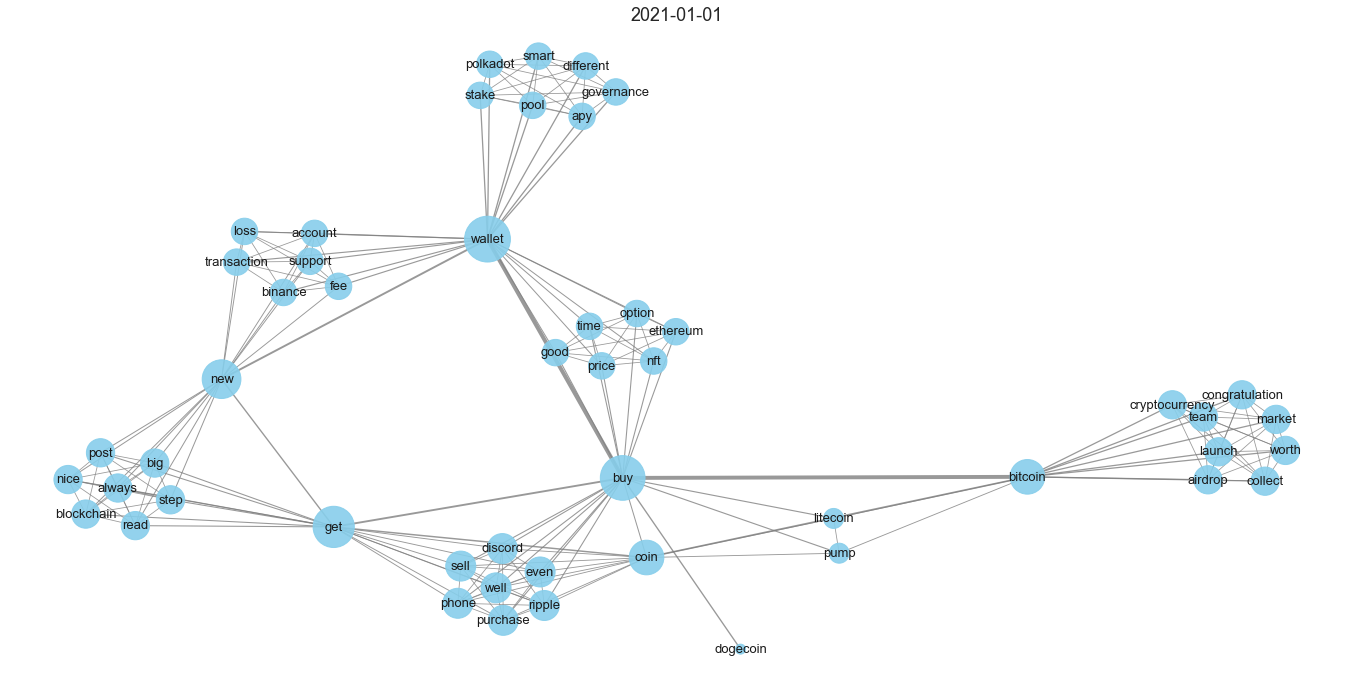

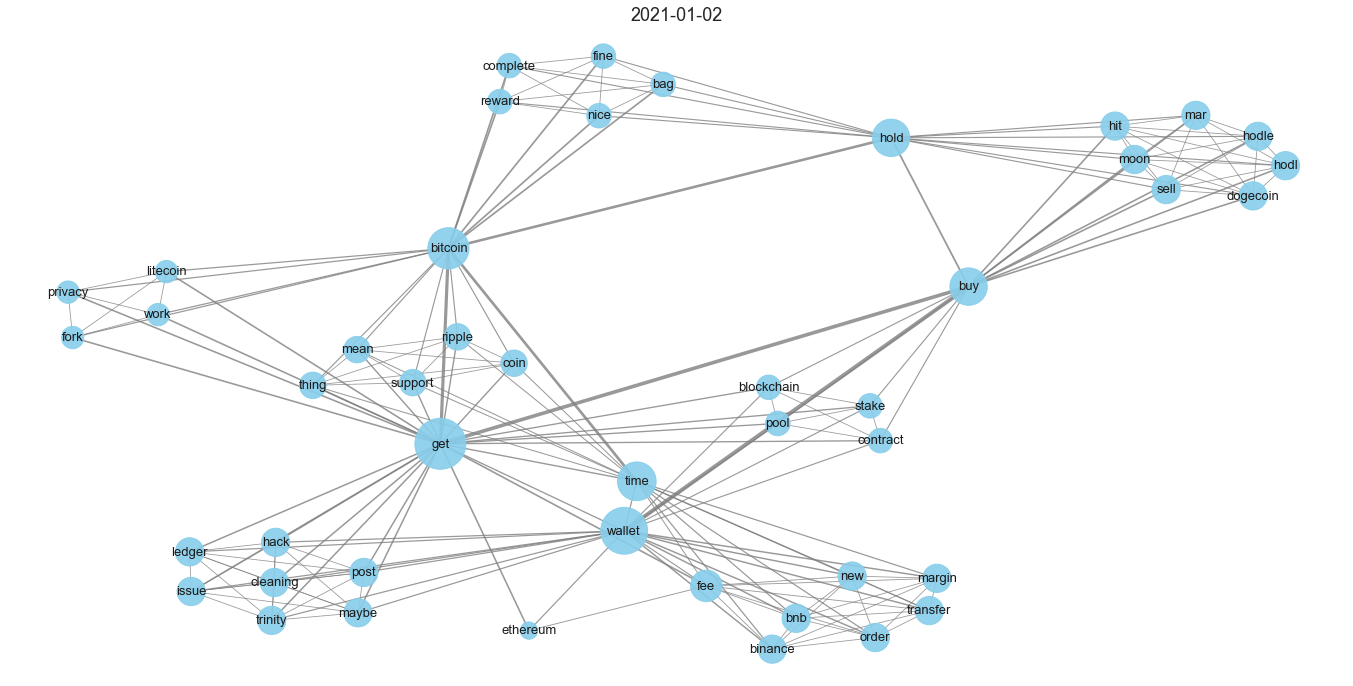

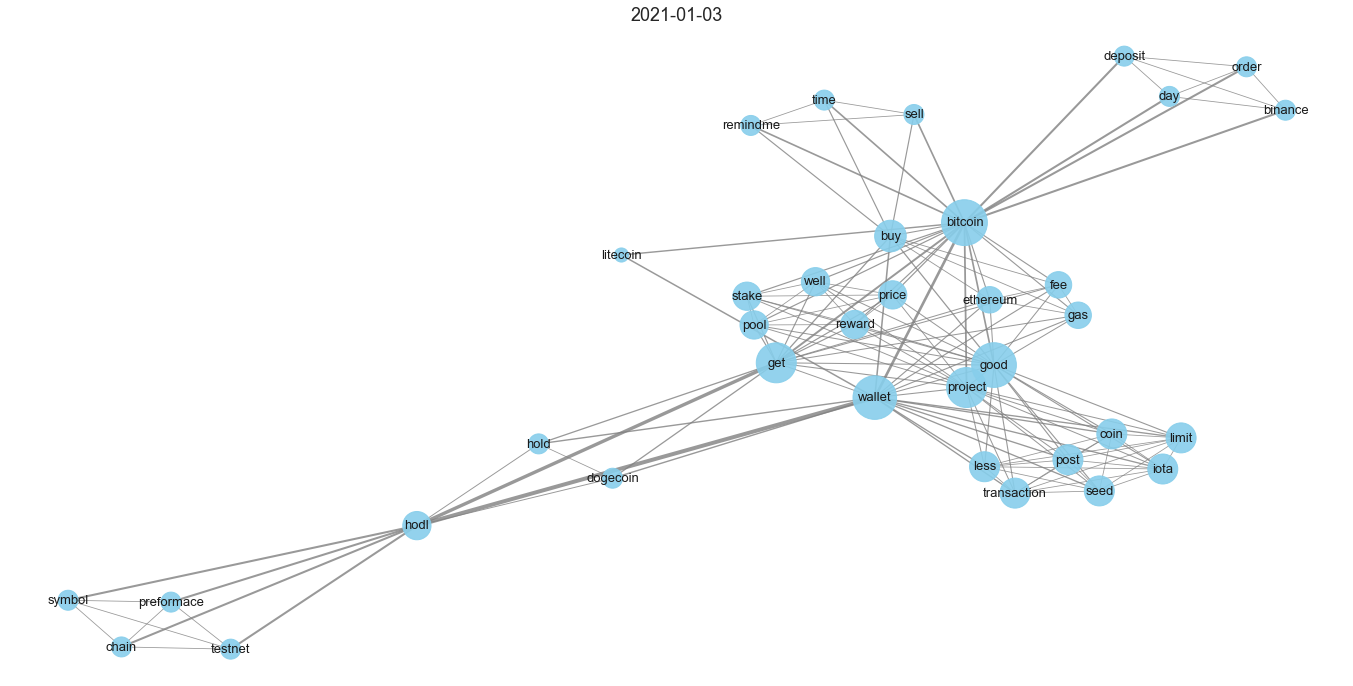

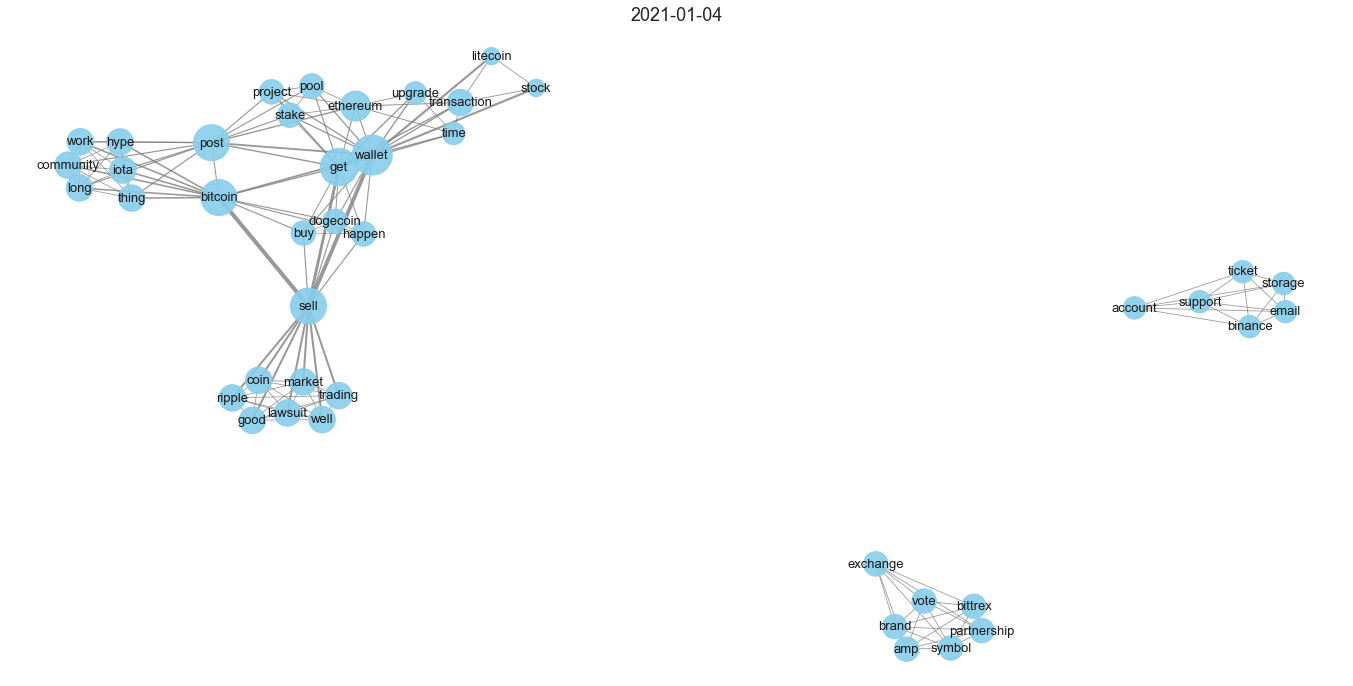

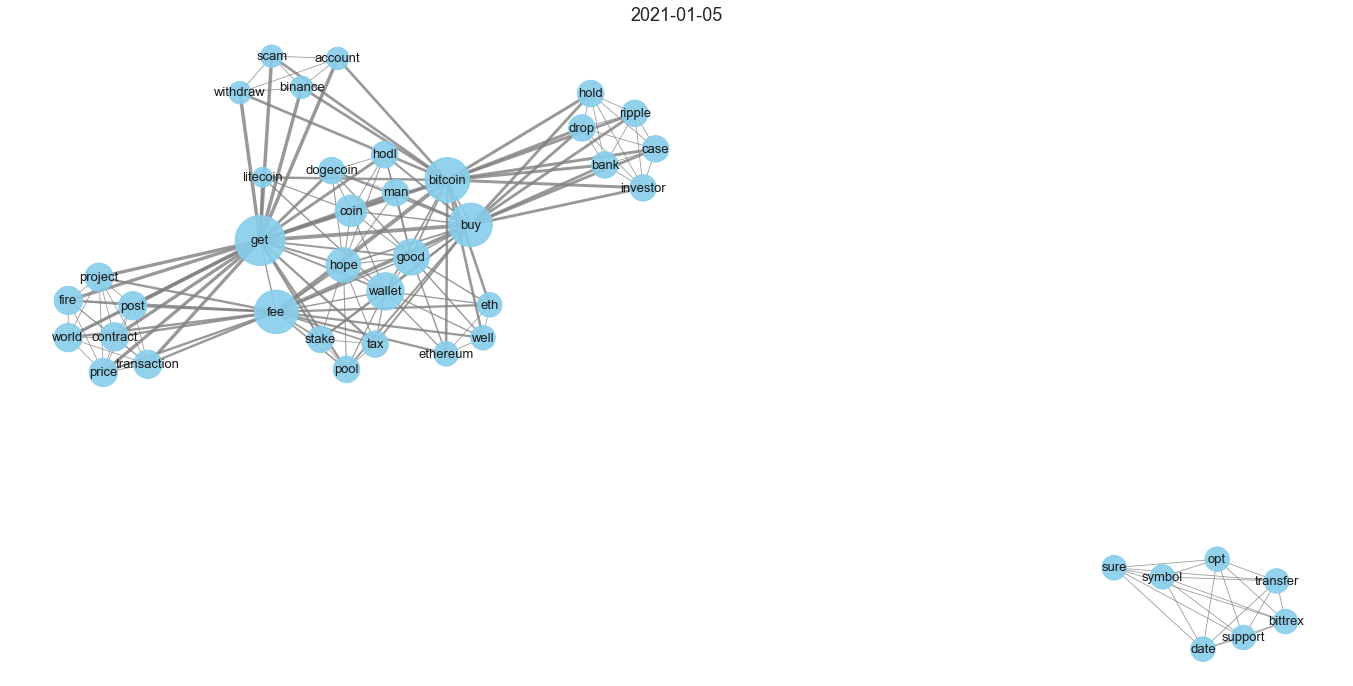

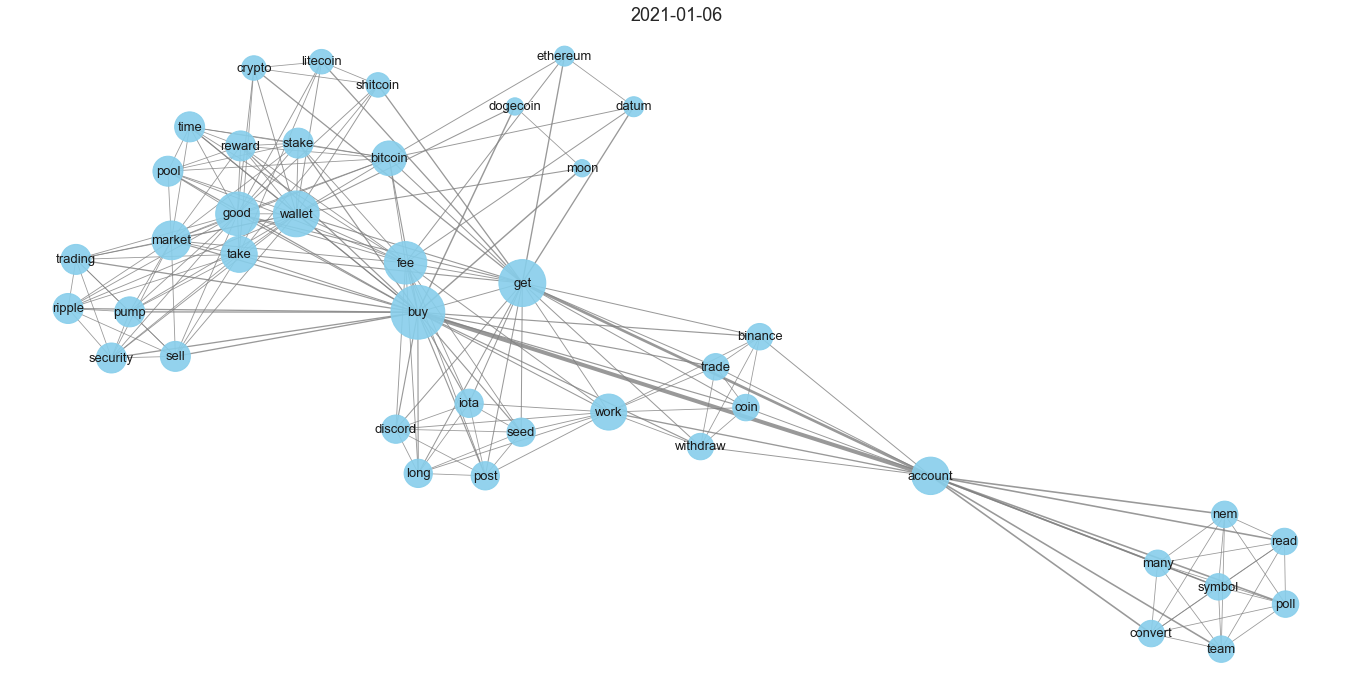

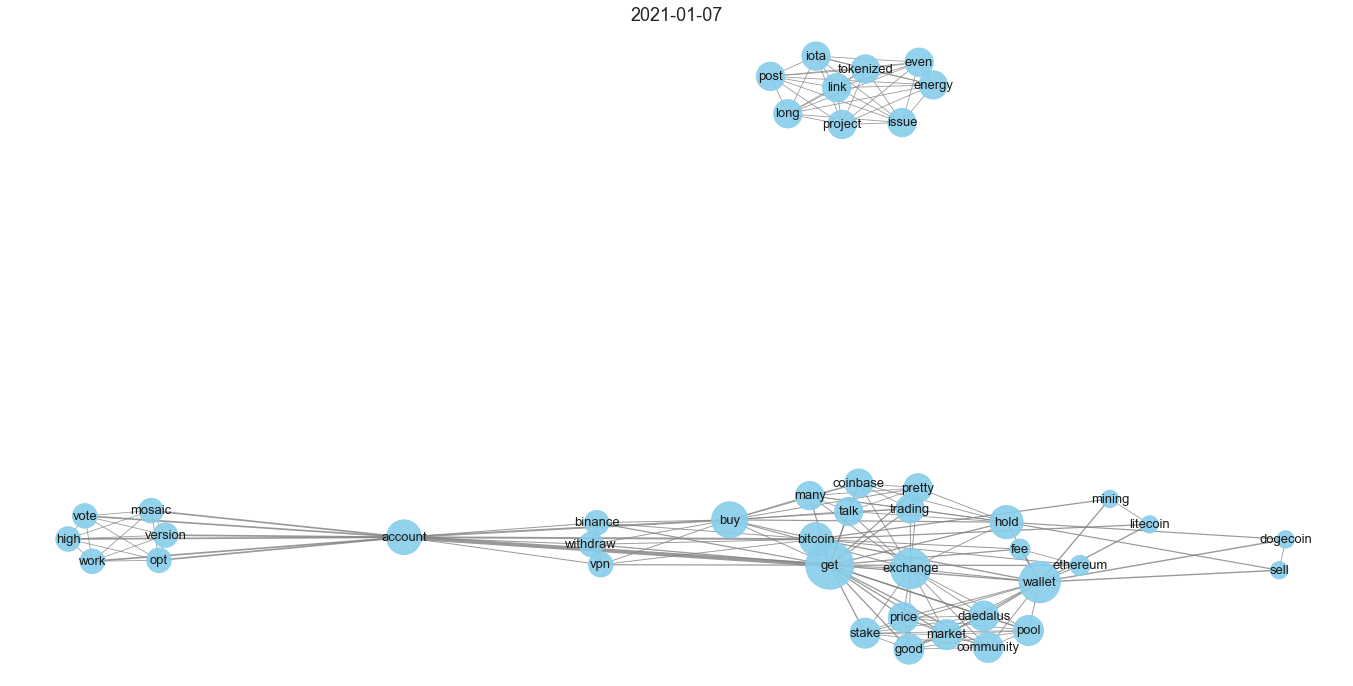

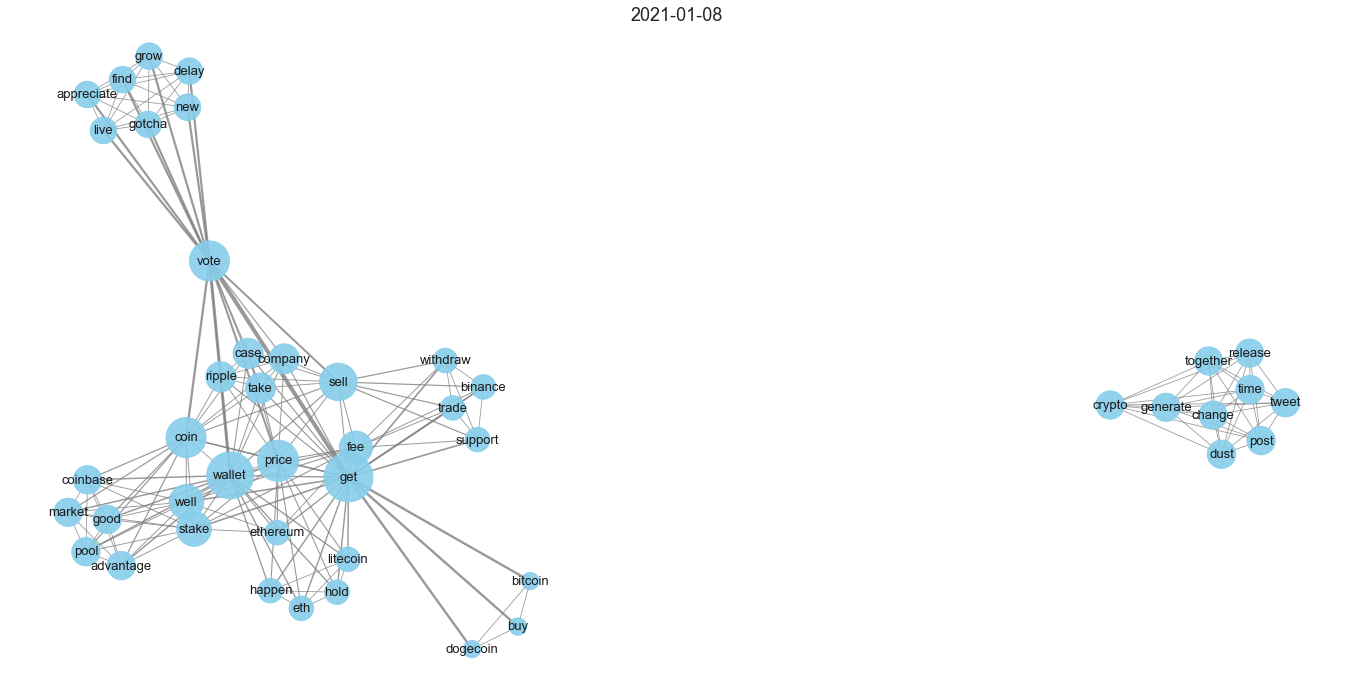

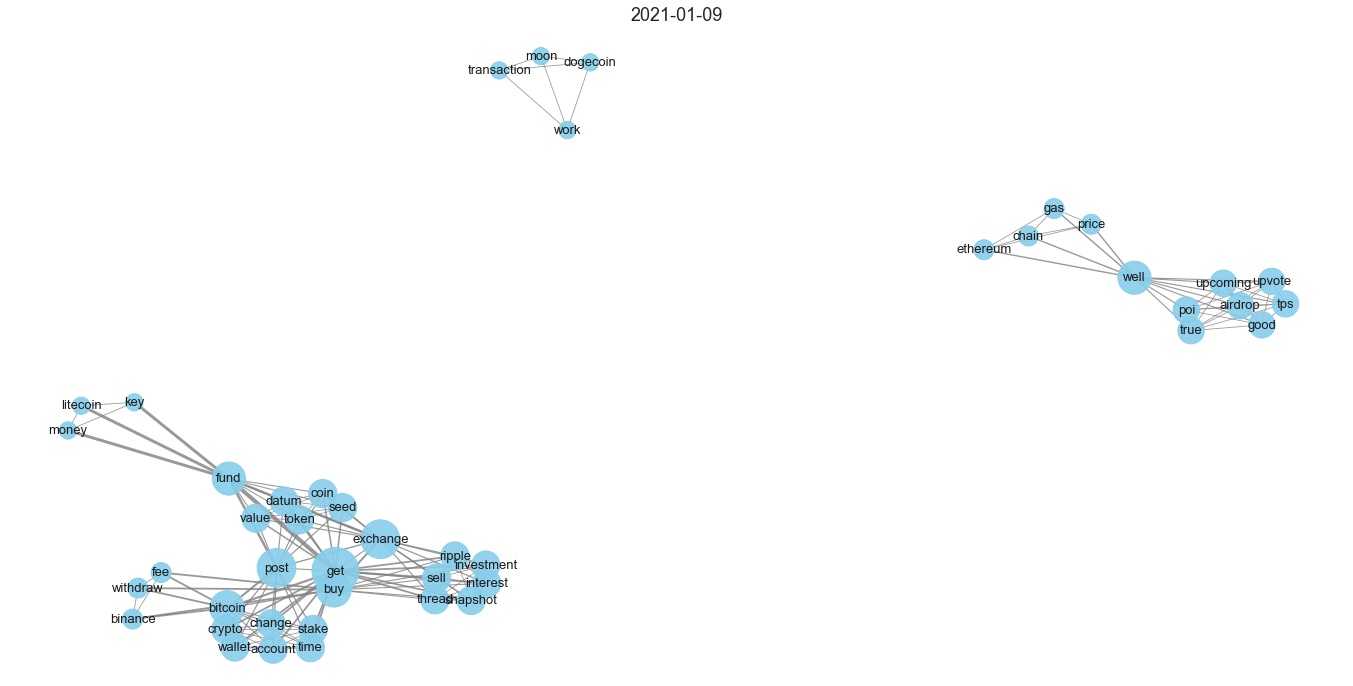

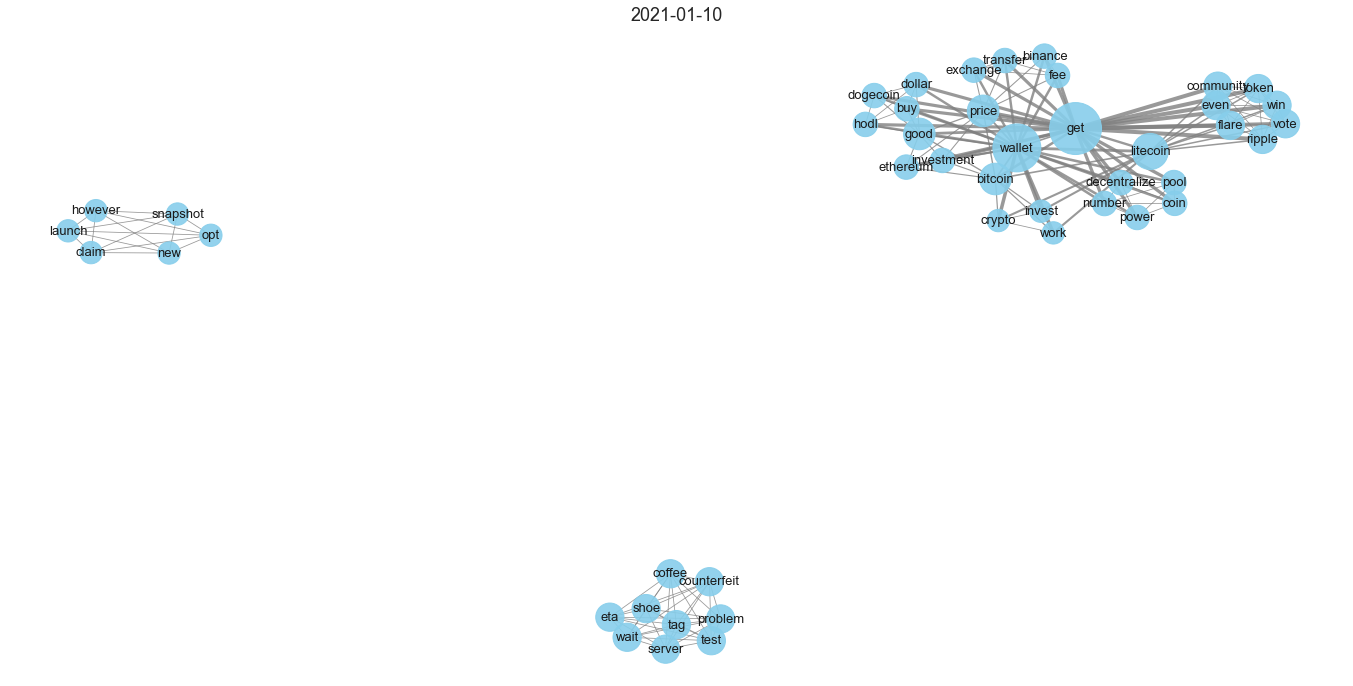

In [69]:
dates = np.arange('2021-01-01', '2021-02-28', dtype='datetime64[D]')
t_min = 0.8
t_max = 4

for i in range(10):
    fig = plt.figure(i, figsize=(24, 12))
    plt.axis('off')
    plt.title(dates[i], fontsize = 18)
    pos = nx.spring_layout(G_list[i], k=0.3)
    d = dict(G_list[i].degree)
    
    widths = nx.get_edge_attributes(G_list[i], 'betweenness')
    
    values = widths.values()
    w_min = min(values)
    w_max = max(values)

    norm_widths = {key: ((v - w_min) / (w_max - w_min)) * (t_max - t_min) + t_min  for (key, v) in widths.items()}

    nx.draw_networkx_nodes(G_list[i], pos = pos, node_size =[v * 100 for v in d.values()], with_labels=True, node_color = 'skyblue', alpha = 0.9)
    nx.draw_networkx_edges(G_list[i], pos = pos, width = list(norm_widths.values()), edge_color = 'grey', alpha = 0.8)
    nx.draw_networkx_labels(G_list[i], pos = pos,font_size = 13)
    
    if i < 5:
        plt.savefig('../image/Network_' + str(dates[i]), dpi = 800)

### • Centrality measure

#### - Degree centrality -
The degree of a node is the number of other nodes to which it is connected

In [41]:
dc = []
for i in range(num_of_timeframes):
    degree_centrality = nx.degree_centrality(G_list[i])
    dc = dc + sorted(degree_centrality.items(), key=lambda x:x[1], reverse=True)[:3]
    
dc = np.reshape(dc, (58, 6))
df_dc = pd.DataFrame(dc)
df_dc.index = dates
for i in range(1, 6, 2):
    df_dc[i] = df_dc[i].astype(float).round(2)

df_dc.rename(columns={0: 'Top 1', 1: 'Degree centrality 1',
                      2: 'Top 2', 3: 'Degree centrality 2',
                      4: 'Top 3', 5: 'Degree centrality 3',}, inplace=True)
df_dc.head(10)

,Top 1,Degree centrality 1,Top 2,Degree centrality 2,Top 3,Degree centrality 3
2021-01-01,wallet,0.43,buy,0.41,get,0.35
2021-01-02,get,0.58,wallet,0.49,bitcoin,0.38
2021-01-03,bitcoin,0.60,good,0.57,wallet,0.54
2021-01-04,wallet,0.38,get,0.33,post,0.31
2021-01-05,get,0.61,bitcoin,0.49,buy,0.46
2021-01-06,buy,0.71,get,0.54,wallet,0.51
2021-01-07,get,0.55,wallet,0.40,exchange,0.38
2021-01-08,get,0.53,wallet,0.49,price,0.38
2021-01-09,get,0.50,exchange,0.34,post,0.34
2021-01-10,get,0.60,wallet,0.51,litecoin,0.29


In [42]:
dfi.export(df_dc.head(), '../image/degree_centrality.png')

In [43]:
dc_top3_centralities = list(df_dc['Top 1']) + list(df_dc['Top 2']) + list(df_dc['Top 3'])
df_dc_top3_centralities = pd.DataFrame(dc_top3_centralities)
df_dc_value_counts = df_dc_top3_centralities[0].value_counts().rename_axis('Topics').reset_index(name='Counts')
df_dc_value_counts['Percentage'] = df_dc_value_counts['Counts'].div(len(dc_top3_centralities)).apply(lambda x: format(x, '.1%'))
df_dc_value_counts.head(10)

,Topics,Counts,Percentage
0,get,42,24.1%
1,wallet,37,21.3%
2,buy,29,16.7%
3,bitcoin,10,5.7%
4,coin,6,3.4%
5,good,6,3.4%
6,post,6,3.4%
7,price,5,2.9%
8,fee,5,2.9%
9,exchange,4,2.3%


In [44]:
dfi.export(df_dc_value_counts.head(), '../image/value_count_degree_centrality.png')

In [45]:
# df_dc['Time interval'][(df_dc['Top 1'] == 'buy')]

==============================================================================================================================================

#### - Betweenness centrality -
Betweenness centrality quantifies the number of times a node acts as a bridge(or "broker") along the shortest path between two other nodes.

In [46]:
bc = []
for i in range(num_of_timeframes):
    betweenness_centrality = nx.betweenness_centrality(G_list[i])
    bc = bc + sorted(betweenness_centrality.items(), key=lambda x:x[1], reverse=True)[:3]
    
bc = np.reshape(bc, (58, 6))
df_bc = pd.DataFrame(bc)
df_bc.index = dates
for i in range(1, 6, 2):
    df_bc[i] = df_bc[i].astype(float).round(2)

df_bc.rename(columns={0: 'Top 1', 1: 'Betweenness centrality 1',
                      2: 'Top 2', 3: 'Betweenness centrality 2',
                      4: 'Top 3', 5: 'Betweenness centrality 3',}, inplace=True)
df_bc.head(10)

,Top 1,Betweenness centrality 1,Top 2,Betweenness centrality 2,Top 3,Betweenness centrality 3
2021-01-01,buy,0.45,wallet,0.39,bitcoin,0.28
2021-01-02,get,0.34,bitcoin,0.21,buy,0.21
2021-01-03,bitcoin,0.33,wallet,0.26,hodl,0.21
2021-01-04,sell,0.18,wallet,0.12,bitcoin,0.10
2021-01-05,get,0.20,bitcoin,0.14,buy,0.10
2021-01-06,buy,0.35,account,0.29,get,0.19
2021-01-07,get,0.22,account,0.19,wallet,0.09
2021-01-08,vote,0.21,get,0.20,wallet,0.11
2021-01-09,get,0.13,fund,0.08,post,0.04
2021-01-10,get,0.19,wallet,0.11,litecoin,0.03


In [47]:
dfi.export(df_bc.head(), '../image/betweenness_centrality.png')

In [48]:
bc_top3_centralities = list(df_bc['Top 1']) + list(df_bc['Top 2']) + list(df_bc['Top 3'])
df_bc_top3_centralities = pd.DataFrame(bc_top3_centralities)
df_bc_value_counts = df_bc_top3_centralities[0].value_counts().rename_axis('Topics').reset_index(name='Counts')
df_bc_value_counts['Percentage'] = df_bc_value_counts['Counts'].div(len(bc_top3_centralities)).apply(lambda x: format(x, '.1%'))
df_bc_value_counts.head(10)

,Topics,Counts,Percentage
0,get,42,24.1%
1,wallet,36,20.7%
2,buy,28,16.1%
3,bitcoin,17,9.8%
4,coin,7,4.0%
5,price,4,2.3%
6,fee,4,2.3%
7,post,3,1.7%
8,exchange,3,1.7%
9,good,3,1.7%


In [49]:
dfi.export(df_bc_value_counts.head(), '../image/value_count_betweenness_centrality.png')

In [50]:
# df_bc['Time interval'][(df_bc['Top 1'] == 'buy')]

### • Changes in topology

In [51]:
n = len(union_topics_list)
num_topics = [len(topics) for topics in union_topics_list]
num_new_topics = [None] * n
num_preexisting_topics = [None] * n
num_disappearing_topics = [None] * n
perc_new_topics = [None] * n
perc_preexisting_topics = [None] * n


for i in range(n-1):
    num_new_topics[i+1] = len(list(set(union_topics_list[i+1]) - set(union_topics_list[i])))
    num_preexisting_topics[i+1] = len(list(set(union_topics_list[i+1]) & set(union_topics_list[i])))
    num_disappearing_topics[i+1] = len(list(set(union_topics_list[i]) - set(union_topics_list[i+1])))
    perc_new_topics[i+1] = num_new_topics[i+1] / num_topics[i-1]
    perc_preexisting_topics[i+1] = num_preexisting_topics[i+1] / num_topics[i-1]

In [52]:
data = {'No. of topics': num_topics,
        'No. of new topics': num_new_topics,
        '% new topics': perc_new_topics,
        'No. of pre-existing topics': num_preexisting_topics,
        '% pre-existing topics': perc_preexisting_topics,
        'No. of disappearing topics': num_disappearing_topics}


df_topology = pd.DataFrame(data)
df_topology.index = dates #['TF ' + str(i+1) for i in range(n)]
df_topology = df_topology.fillna(0)

df_topology['No. of new topics']= df_topology['No. of new topics'].astype(int)
df_topology['No. of pre-existing topics']= df_topology['No. of pre-existing topics'].astype(int)
df_topology['No. of disappearing topics']= df_topology['No. of disappearing topics'].astype(int)

df_topology['% new topics']= df_topology['% new topics'].apply(lambda x: float(format(x*100, '.1f')))
df_topology['% pre-existing topics']= df_topology['% pre-existing topics'].apply(lambda x: float(format(x*100, '.1f')))

df_topology.head(10)

,No. of topics,No. of new topics,% new topics,No. of pre-existing topics,% pre-existing topics,No. of disappearing topics
2021-01-01,50,0,0.0,0,0.0,0
2021-01-02,46,26,65.0,20,50.0,30
2021-01-03,36,17,34.0,19,38.0,27
2021-01-04,43,23,50.0,20,43.5,16
2021-01-05,42,21,58.3,21,58.3,22
2021-01-06,42,24,55.8,18,41.9,24
2021-01-07,43,21,50.0,22,52.4,20
2021-01-08,46,26,61.9,20,47.6,23
2021-01-09,45,24,55.8,21,48.8,25
2021-01-10,46,27,58.7,19,41.3,26


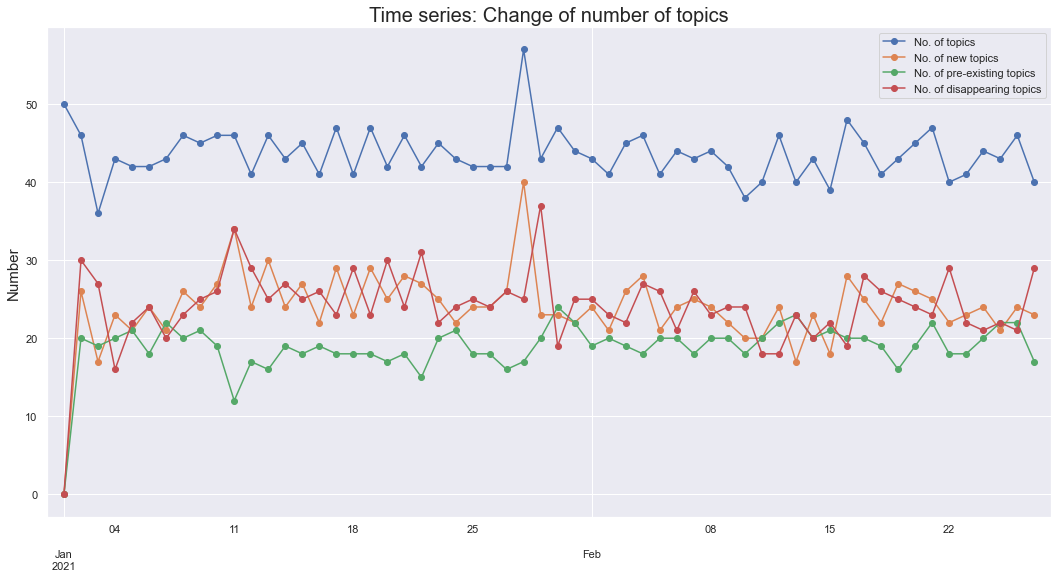

In [53]:
sns.set(rc={'figure.figsize':(18, 9)})
num_plot = ['No. of topics', 'No. of new topics','No. of pre-existing topics', 'No. of disappearing topics']
ax = df_topology[num_plot].plot(marker='o')
ax.set_title('Time series: Change of number of topics', fontsize=20)
ax.set_ylabel('Number', fontsize=15)
ax.set_xlim('2020-12-31', '2021-02-28')
plt.savefig('../image/Time series 1.png', dpi = 800)

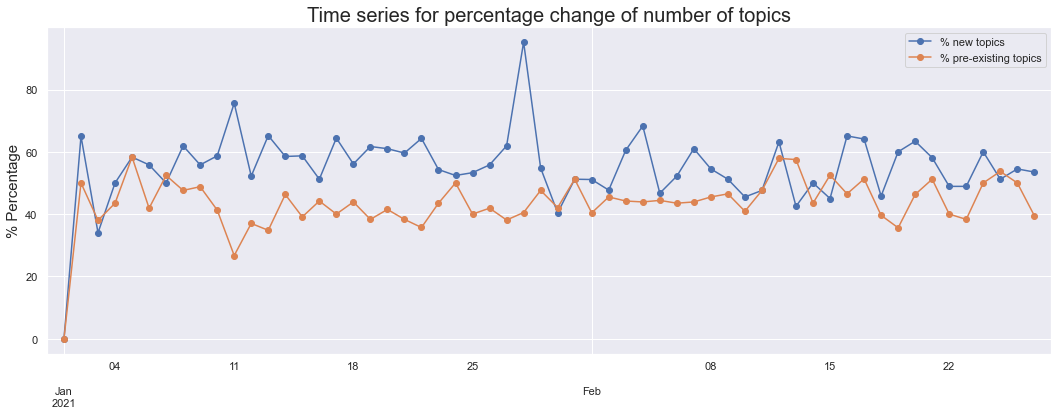

In [54]:
sns.set(rc={'figure.figsize':(18, 6)})
perc_plot = ['% new topics', '% pre-existing topics']
ax = df_topology[perc_plot].plot(marker='o')
ax.set_title('Time series for percentage change of number of topics', fontsize=20)
ax.set_ylabel('% Percentage', fontsize=15)
ax.set_xlim('2020-12-31', '2021-02-28')
plt.savefig('../image/Time series 2.png', dpi = 800)

# # Set x-axis major ticks to weekly interval, on Mondays
# ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# # Format x-tick labels as 3-letter month name and day number
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));